In [1]:
# import the necessary packages
import imutils
def pyramid(image, scale=1.5, minSize=(30, 30)):
	# yield the original image
	yield image
	# keep looping over the pyramid
	while True:
		# compute the new dimensions of the image and resize it
		w = int(image.shape[1] / scale)
		image = imutils.resize(image, width=w)
		# if the resized image does not meet the supplied minimum
		# size, then stop constructing the pyramid
		if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
			break
		# yield the next image in the pyramid
		yield image
def sliding_window(image, stepSize, windowSize):
	# slide a window across the image
	for y in range(0, image.shape[0], stepSize):
		for x in range(0, image.shape[1], stepSize):
			# yield the current window
			yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

In [3]:

import argparse
import time
import cv2
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True, help="Path to the image")
args = vars(ap.parse_args())
# load the image and define the window width and height
image = cv2.imread(args["image"])
(winW, winH) = (128, 128)

# loop over the image pyramid
for resized in pyramid(image, scale=1.5):
	# loop over the sliding window for each layer of the pyramid
	for (x, y, window) in sliding_window(resized, stepSize=32, windowSize=(winW, winH)):
		# if the window does not meet our desired window size, ignore it
		if window.shape[0] != winH or window.shape[1] != winW:
			continue
		# THIS IS WHERE YOU WOULD PROCESS YOUR WINDOW, SUCH AS APPLYING A
		# MACHINE LEARNING CLASSIFIER TO CLASSIFY THE CONTENTS OF THE
		# WINDOW
		# since we do not have a classifier, we'll just draw the window
		clone = resized.copy()
		cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
		cv2.imshow("Window", clone)
		cv2.waitKey(1)
		time.sleep(0.025)

usage: ipykernel_launcher.py [-h]
ipykernel_launcher.py: error: unrecognized arguments: -f /Users/Andy/Library/Jupyter/runtime/kernel-e04b4fc5-4e5f-4b54-a1c9-3179553653e9.json


SystemExit: 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


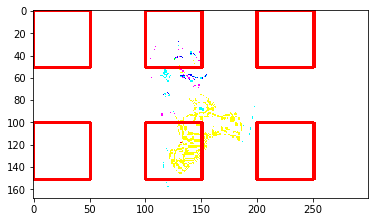

'image, start_point, end_point, color, thickness'

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# read the image and define the stepSize and window size 
# (width,height)
image = cv2.imread("mario.jpeg") # your image path
tmp = image # for drawing a rectangle
stepSize = 100
(w_width, w_height) = (51, 51) # window size
for x in range(0, image.shape[1] - w_width , stepSize):
    for y in range(0, image.shape[0] - w_height, stepSize):
       window = image[x:x + w_width, y:y + w_height, :]
       cv2.rectangle(tmp, (x, y), (x + w_width, y + w_height), (255, 0, 0), 2) # draw rectangle on image
       plt.imshow(np.array(tmp).astype('float32'))
plt.show()

'''image, start_point, end_point, color, thickness'''

In [17]:
print(tmp)

[[[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255   0   0]
  [255   0   0]
  [255   0   0]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255   0   0]
  [255   0   0]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
